In [1]:
# Import Libraries
import os
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
import seaborn as sns
import earthpy as et
import earthpy.plot as ep
import scipy

In [2]:
# Working directory
work_dir = '/Users/arbailey/natcap/idb/data/work/mangroves/tandemx/'
os.chdir(work_dir)
gmf_hmax_source = os.path.join(work_dir, 'gmf_Andros_TDX_DEM_12m_EGM2008_CanopyHeight.tif')
gmw2016_hmax_source = os.path.join(work_dir, 'gmw2016_Andros_TDX_DEM_12m_EGM2008_CanopyHeight.tif')
wam_hmax_source = os.path.join(work_dir, 'wam_Andros_TDX_DEM_12m_EGM2008_CanopyHeight.tif')
tnc_hmax_soure = os.path.join(work_dir, 'tnc_Andros_TDX_DEM_12m_EGM2008_CanopyHeight.tif')

In [3]:
# Read in the max height rasters - GMF
with rio.open(gmf_hmax_source) as src:
    gmf_hmax = src.read(1, masked=True)
# GMW 2016 raster
with rio.open(gmw2016_hmax_source) as src:
    gmw2016_hmax = src.read(1, masked=True)
# WAM 
with rio.open(wam_hmax_source) as src:
    wam_hmax = src.read(1, masked=True)
# TNC
with rio.open(tnc_hmax_soure) as src:
    tnc_hmax = src.read(1, masked=True)

In [28]:
def hist_manghgt(data_np, title_text):
    sns.set(font_scale=2.5, style="whitegrid")
    fig, ax = ep.hist(data_np, 
        bins = np.arange(21), # [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
        colors=['brown'],
        title=title_text,
        xlabel='Max Canopy Height (m)',
        ylabel='Number of Pixels') 
    return (fig, ax)

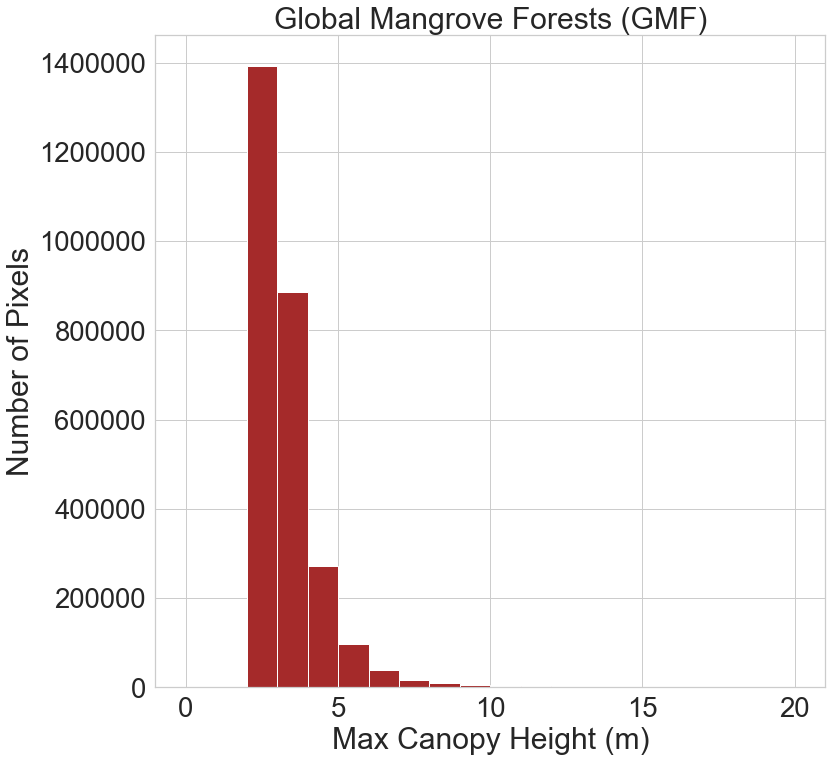

In [29]:
gmf_hmax_hist = hist_manghgt(gmf_hmax, 'Global Mangrove Forests (GMF)')

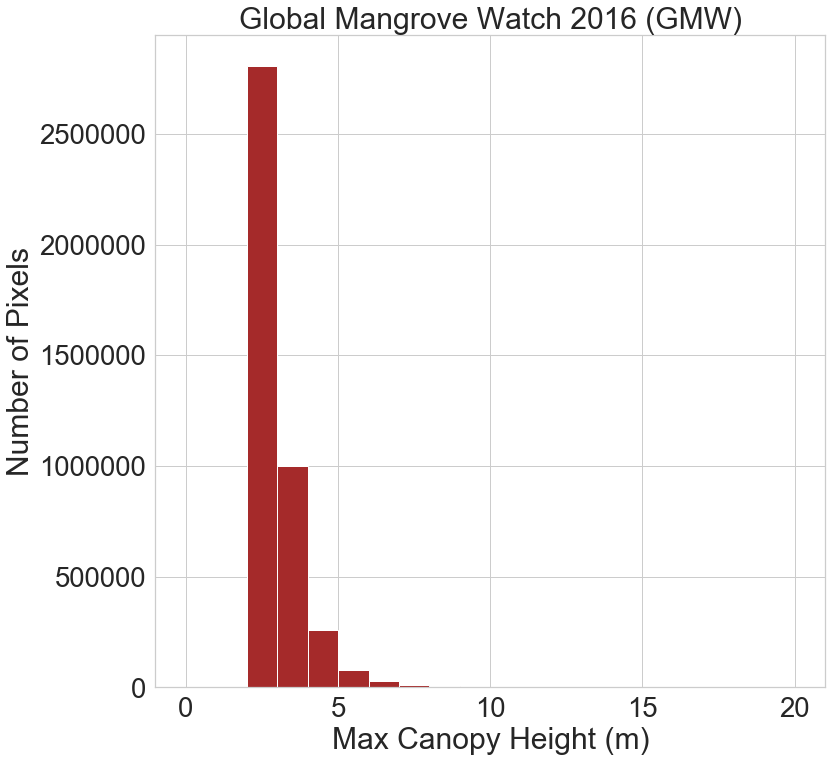

In [30]:
gmw2016_hmax_hist = hist_manghgt(gmw2016_hmax, 'Global Mangrove Watch 2016 (GMW)')

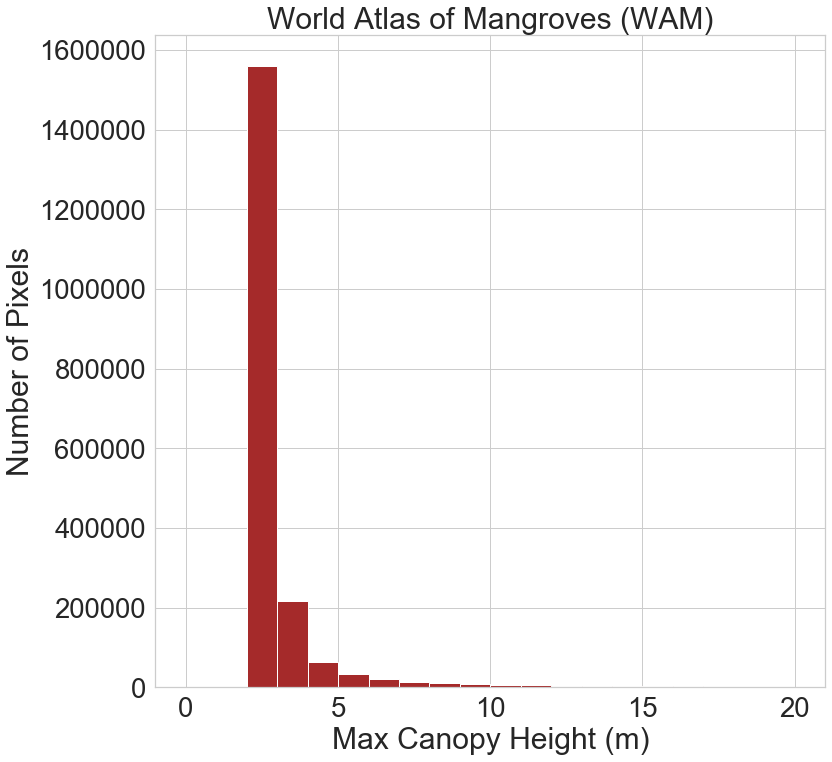

In [31]:
wam_hmax_hist = hist_manghgt(wam_hmax, 'World Atlas of Mangroves (WAM)')

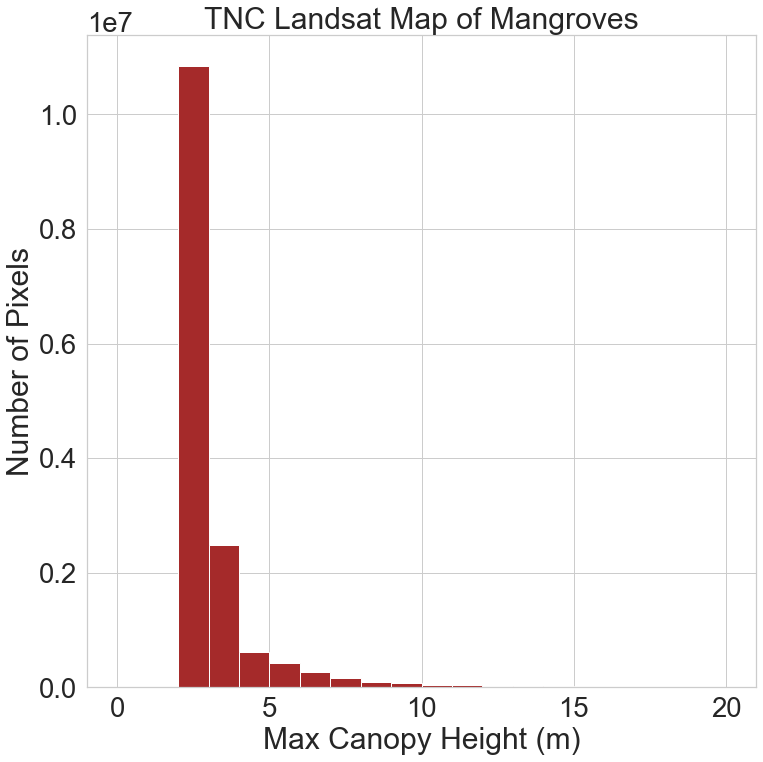

In [32]:
tnc_hmax_hist = hist_manghgt(tnc_hmax, 'TNC Landsat Map of Mangroves')

In [18]:
# See the values in each bin of the histogram
def hist_table(data):
    counts,bins = np.histogram(data, bins=np.arange(56)) # 54.3 is max value for Andros TanDEM-X canopy heights
    print("counts:", counts)
    print("bins:", bins)

In [19]:
hist_table(gmf_hmax)
print(np.min(gmf_hmax))
print(np.max(gmf_hmax))

counts: [217934791         0   1392222    885550    270832     96808     38304
     17474      9949      5991      3713      2239      1432       953
       825       697       546       456       333       208       136
        93        88        72        54        60        66        65
        49        46        47        39        30        39        32
        31        35        26        24        17        16        16
        18        12        11         9         9        12        11
         9         7         5         6         7         1]
bins: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
2.0600035
54.153572


In [20]:
hist_table(gmw2016_hmax)
print(np.min(gmw2016_hmax))
print(np.max(gmw2016_hmax))

counts: [481853309         0   2806216    998931    258026     78782     26481
      9931      4761      2603      1477       862       547       420
       298       258       222       185       180       142       121
       145       119       118        83        84        65        67
        60        71        63        36        38        28        16
        23        27        25        20        18        16         2
        13         9        14         8        14         8         9
        11         4        11         8        13         3]
bins: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
2.0600019
54.22524


In [21]:
hist_table(wam_hmax)
print(np.min(wam_hmax))
print(np.max(wam_hmax))

counts: [217934791         0   1392222    885550    270832     96808     38304
     17474      9949      5991      3713      2239      1432       953
       825       697       546       456       333       208       136
        93        88        72        54        60        66        65
        49        46        47        39        30        39        32
        31        35        26        24        17        16        16
        18        12        11         9         9        12        11
         9         7         5         6         7         1]
bins: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
2.0600035
54.153572


In [33]:
hist_table(tnc_hmax)
print(np.min(tnc_hmax))
print(np.max(tnc_hmax))

counts: [159297427         0  10844165   2477687    624265    430507    272970
    163381    100834     66696     46267     32790     24310     18971
     15824     13480     11920     10853      9563      8282      7412
      6368      5939      5045      4450      4116      3680      3138
      2916      2558      2340      1984      1874      1638      1467
      1319      1169      1007       921       869       759       652
       539       510       430       396       302       299       267
       239       216       192       164       162        40]
bins: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
2.0600019
54.24928
